In [3]:
import pandas as pd

In [42]:
df=pd.read_csv("/content/total_gold data.csv")

In [43]:
df = df.filter(['News', 'Price Sentiment'])
df

,News,Price Sentiment
0,palladium rallies as gold falls,negative
1,gold lower in quiet trading,negative
2,gold steady on dollar's strength,neutral
3,gold gains on dollar weakness,positive
4,gold slips for a second-straight day,negative
...,...,...
9841,"Wedding buzz keeps gold firm at Rs 33,650",neutral
9842,Gold rises for 4th day in a row,positive
9843,India's 2019 gold demand forecast at 750-850 T...,none
9844,"Gold slips Rs 70 to Rs 34,000/10gm on muted de...",negative


In [44]:
df['Price Sentiment'].value_counts()

,count
Price Sentiment,
positive,4109
negative,3625
none,1761
neutral,351


In [7]:
#df.drop(df[df['Price Sentiment']=='none'].index,inplace=True)

<Axes: title={'center': 'Sentiment'}, xlabel='Price Sentiment'>

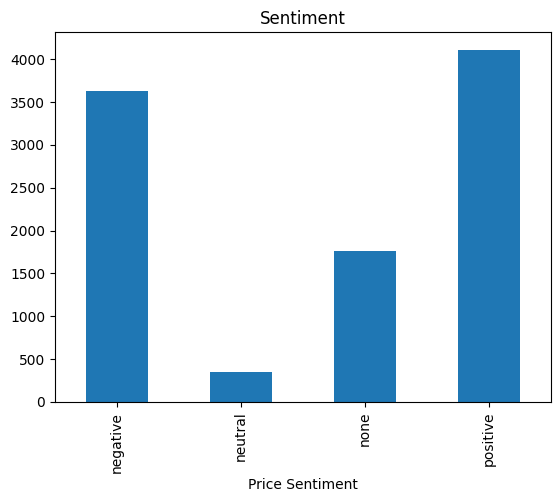

In [45]:
df['Price Sentiment'].value_counts().sort_index().plot(kind="bar",title="Sentiment")

In [46]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [47]:
def get_sentiment_label(news_text):
    result = nlp(news_text)[0]
    return result['label']  # Return only the sentiment label (e.g., 'positive', 'neutral', 'negative')

In [37]:
get_sentiment_label(df['News'][0])

'Neutral'

In [ ]:
#Adding column with the sentiment label to the DataFrame
df['Sentiment_Analysis'] = df['News'].apply(get_sentiment_label)

<Axes: title={'center': 'Sentiment'}, xlabel='Sentiment_Analysis'>

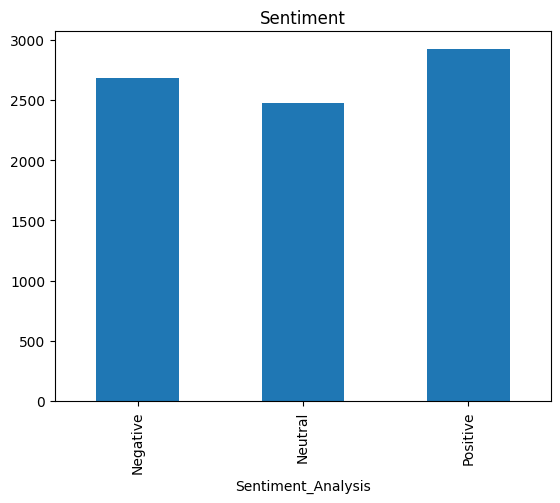

In [41]:
df['Sentiment_Analysis'].value_counts().sort_index().plot(kind="bar",title="Sentiment")